In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

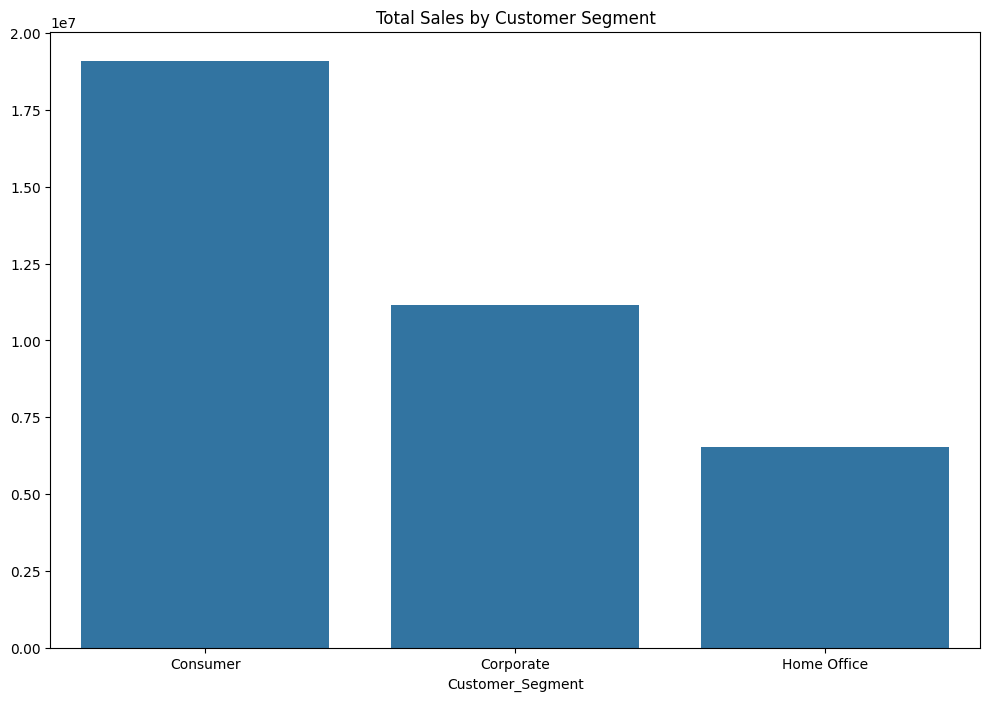

In [68]:
df = pd.read_csv("/Users/branly/Desktop/Python Project/Salesv2.csv")
df1 = pd.read_csv("/Users/branly/Desktop/Python Project/Marketv3.csv")
df22 = pd.read_csv("/Users/branly/Desktop/Python Project/OrderID.csv")

segment_sales = df.groupby('Customer_Segment')['Sales'].sum().sort_values(ascending=False)

#category_sales = df.groupby('Category_Name')['Sales'].sum().sort_values(ascending=False)

location_sales = df.groupby(['Order_Country', 'Order_State', 'Order_City'])['Sales'].sum().sort_values(ascending=False)

df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.set_index('OrderDate', inplace=True)
monthly_sales = df.resample('M')['Sales'].sum()

plt.figure(figsize=(12, 8))
sns.barplot(x=segment_sales.index, y=segment_sales.values)
plt.title('Total Sales by Customer Segment')
plt.show()


/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_82326/1438507919.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis')


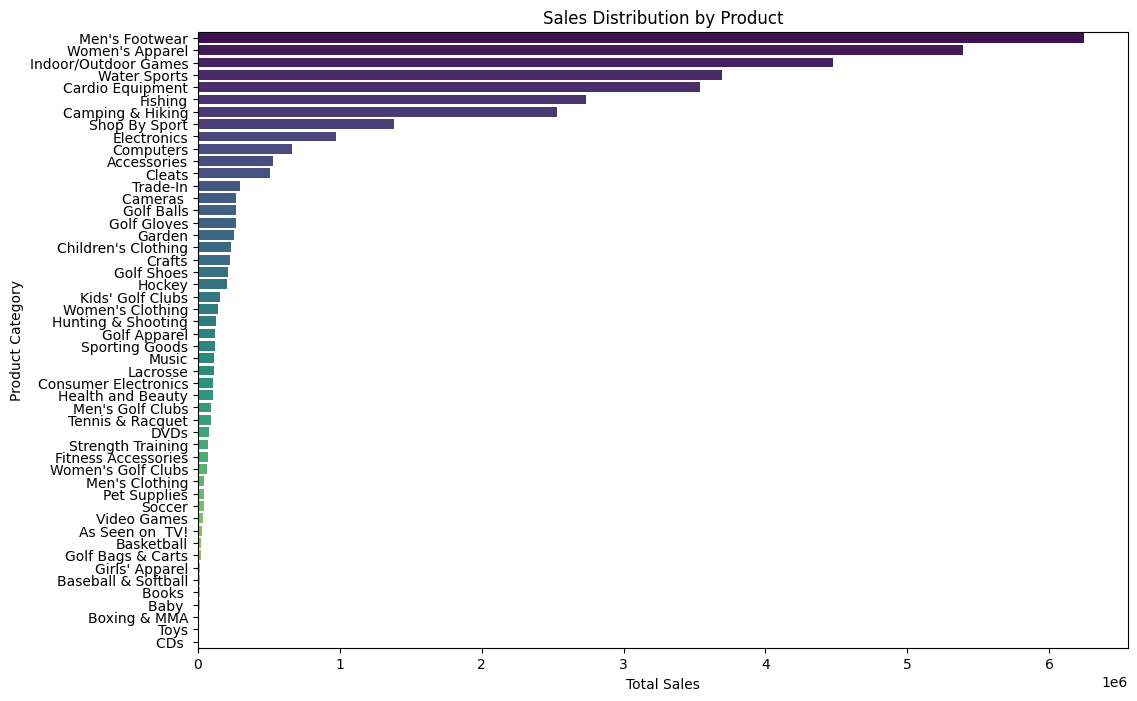

In [143]:
grouped_df['Category_Name'] = grouped_df['Category_Name'].apply(lambda x: x[0] if isinstance(x, list) else x)
product_sales = grouped_df.groupby('Category_Name')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis')
plt.title('Sales Distribution by Product')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_82326/2158156702.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_profitability.index, y=category_profitability.values, palette="viridis")
/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_82326/2158156702.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_profitability.index, y=segment_profitability.values, palette="viridis")


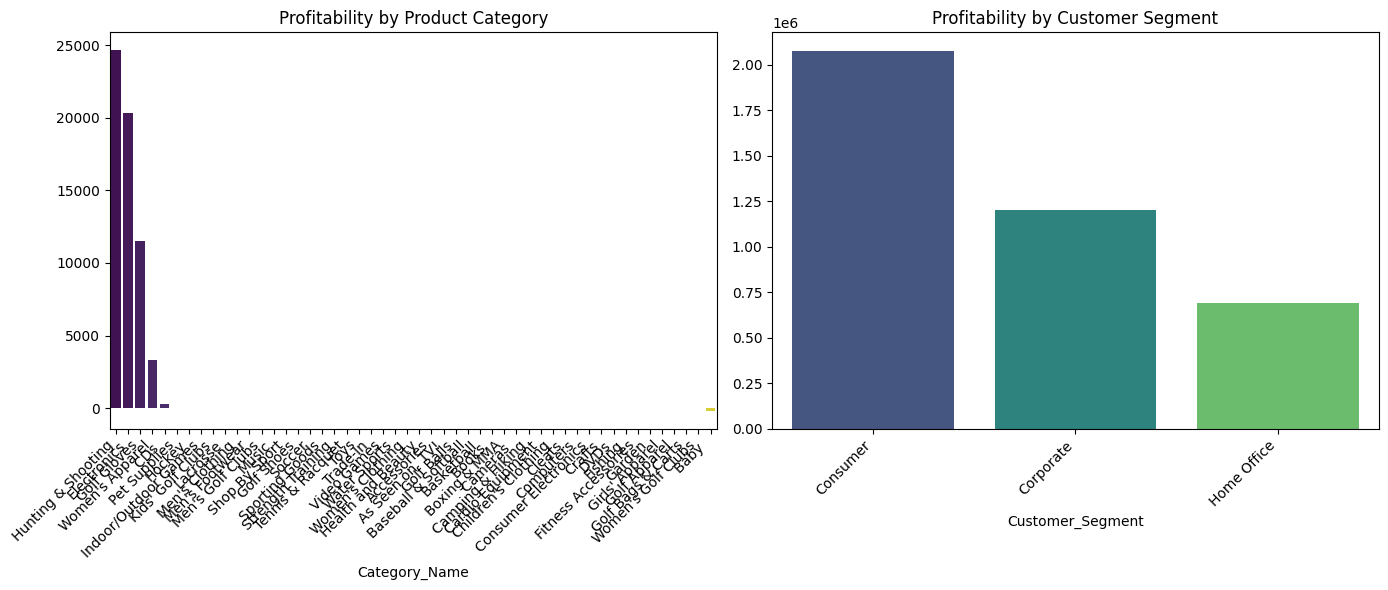

In [144]:


#category_profitability = df.groupby('Category_Name')['Order_Profit_Per_Order'].sum().sort_values(ascending=False)
segment_profitability = df.groupby('Customer_Segment')['Order_Profit_Per_Order'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=category_profitability.index, y=category_profitability.values, palette="viridis")
plt.title('Profitability by Product Category')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.barplot(x=segment_profitability.index, y=segment_profitability.values, palette="viridis")
plt.title('Profitability by Customer Segment')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_82326/1244286762.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_status_pivot.index, y=order_status_pivot['Count'], palette='viridis')


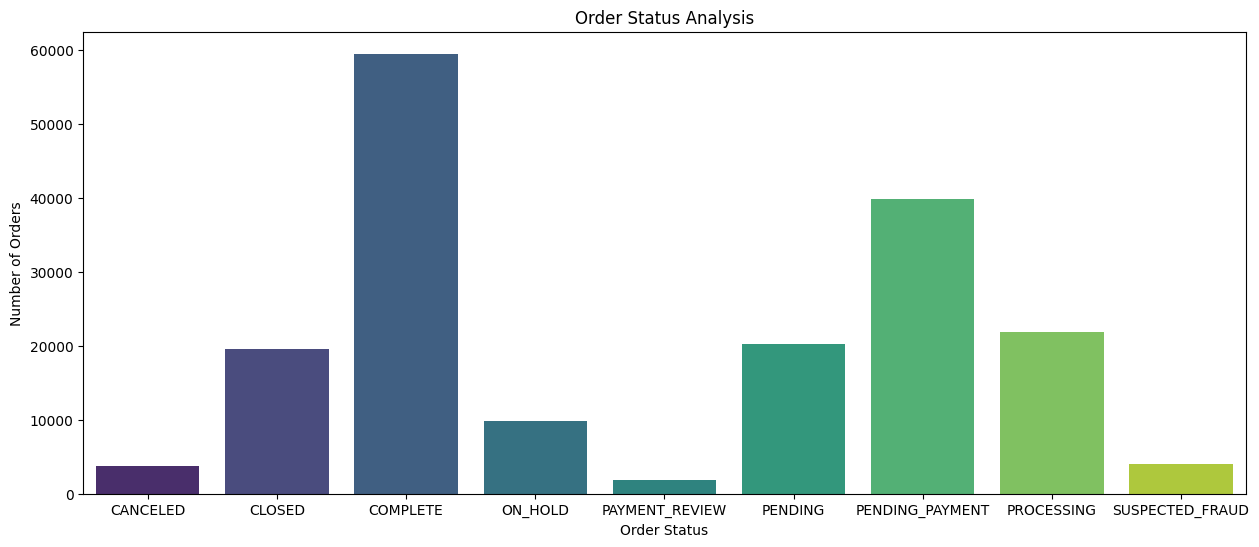

In [ ]:
order_status_counts = df['Order_Status'].value_counts()

order_status_df = pd.DataFrame({'Order_Status': order_status_counts.index, 'Count': order_status_counts.values})

order_status_pivot = order_status_df.pivot_table(index='Order_Status', values='Count', aggfunc='sum')

plt.figure(figsize=(15, 6))
sns.barplot(x=order_status_pivot.index, y=order_status_pivot['Count'], palette='viridis')
plt.title('Order Status Analysis')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.show()

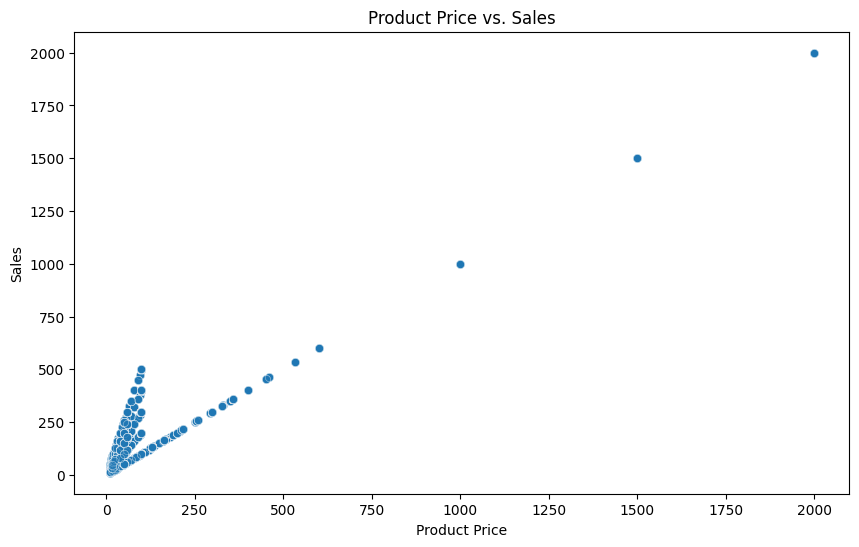

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_82326/2865376836.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Order_Item_Product_Price', y='Sales', data=df1, ci=None)


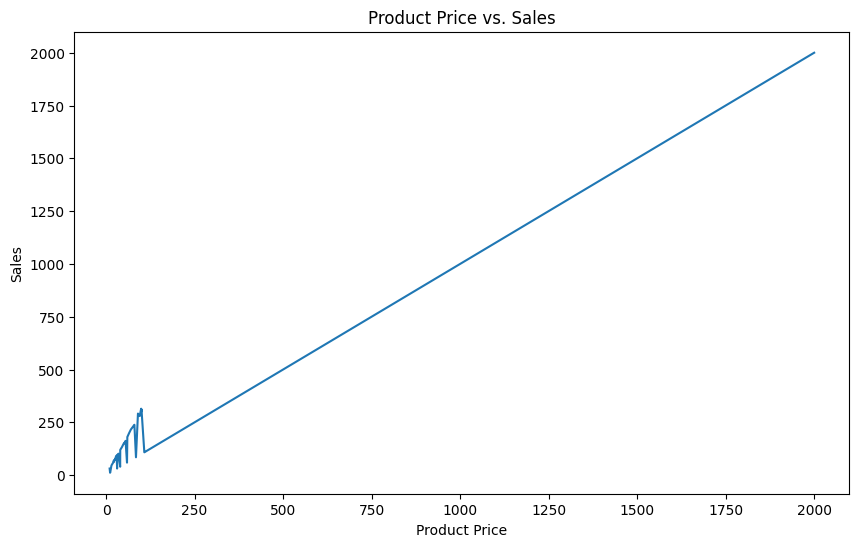

In [145]:
df4 = pd.read_csv("/Users/branly/Desktop/Python Project/Price:sales.csv")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Order_Item_Product_Price', y='Sales', data=df1, alpha=0.5)
plt.title('Product Price vs. Sales')
plt.xlabel('Product Price')
plt.ylabel('Sales')
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(x='Order_Item_Product_Price', y='Sales', data=df1, ci=None)
plt.title('Product Price vs. Sales')
plt.xlabel('Product Price')
plt.ylabel('Sales')
plt.show()

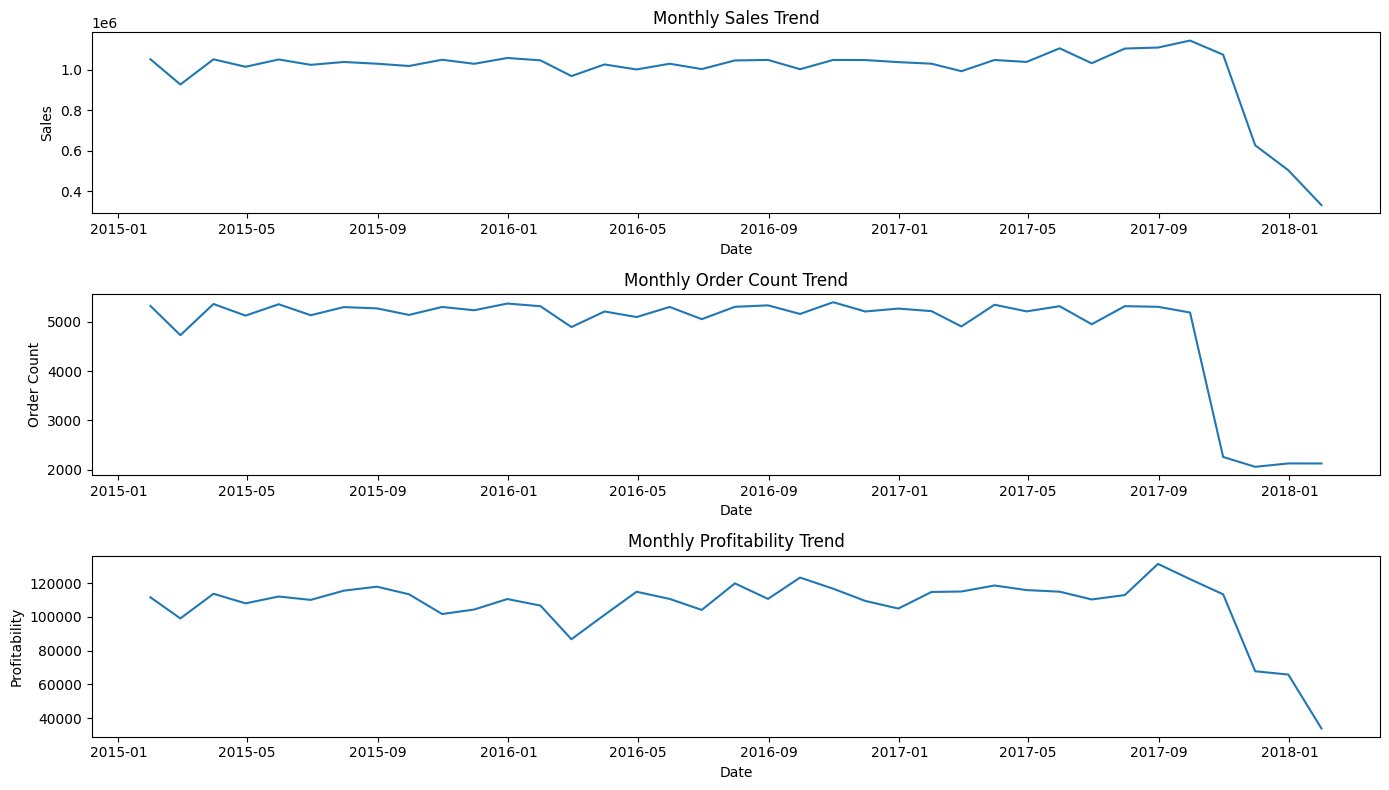

In [69]:
df5 = pd.read_csv("/Users/branly/Desktop/Python Project/TSer.csv")

df22['OrderDate'] = pd.to_datetime(df22['OrderDate'])


df22.set_index('OrderDate', inplace=True)


monthly_data = df22.resample('M').agg({
    'Sales': 'sum',
    'Order_Id': 'count',  
    'Order_Profit_Per_Order': 'sum'  
})


plt.figure(figsize=(14, 8))

# Sales trend
plt.subplot(3, 1, 1)
sns.lineplot(data=monthly_data, x=monthly_data.index, y='Sales')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')

# Order count trend
plt.subplot(3, 1, 2)
sns.lineplot(data=monthly_data, x=monthly_data.index, y='Order_Id')
plt.title('Monthly Order Count Trend')
plt.xlabel('Date')
plt.ylabel('Order Count')

# Profitability trend
plt.subplot(3, 1, 3)
sns.lineplot(data=monthly_data, x=monthly_data.index, y='Order_Profit_Per_Order')
plt.title('Monthly Profitability Trend')
plt.xlabel('Date')
plt.ylabel('Profitability')

plt.tight_layout()
plt.show()

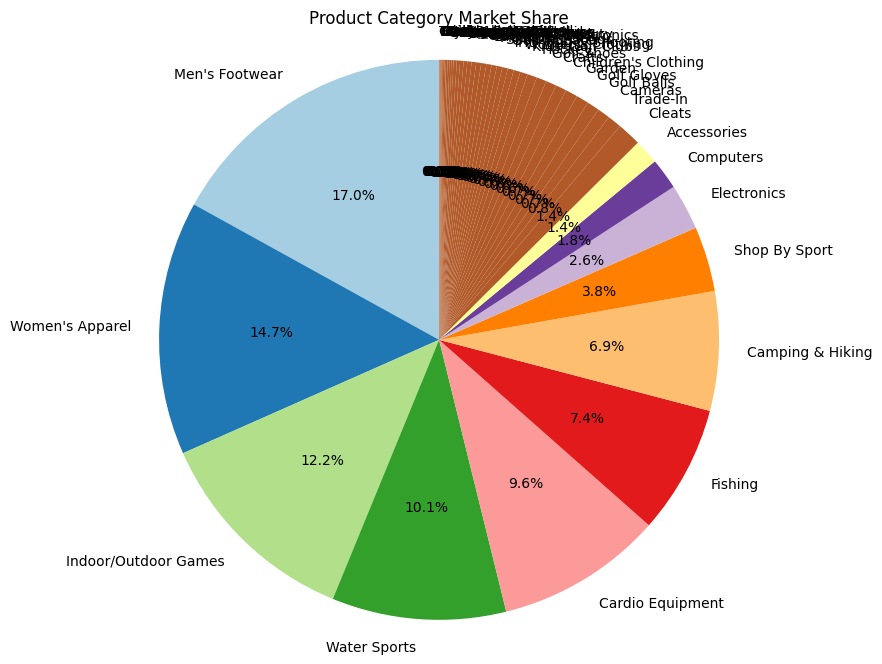

In [142]:
grouped_df['Category_Name'] = grouped_df['Category_Name'].apply(lambda x: x[0] if isinstance(x, list) else x)

category_sales = grouped_df.groupby('Category_Name')['Sales'].sum().sort_values(ascending=False)


market_share = category_sales / category_sales.sum()


plt.figure(figsize=(10, 8))
colors = plt.cm.Paired(range(len(category_sales)))


plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Product Category Market Share')
plt.axis('equal')  
plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_82326/3572158274.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')


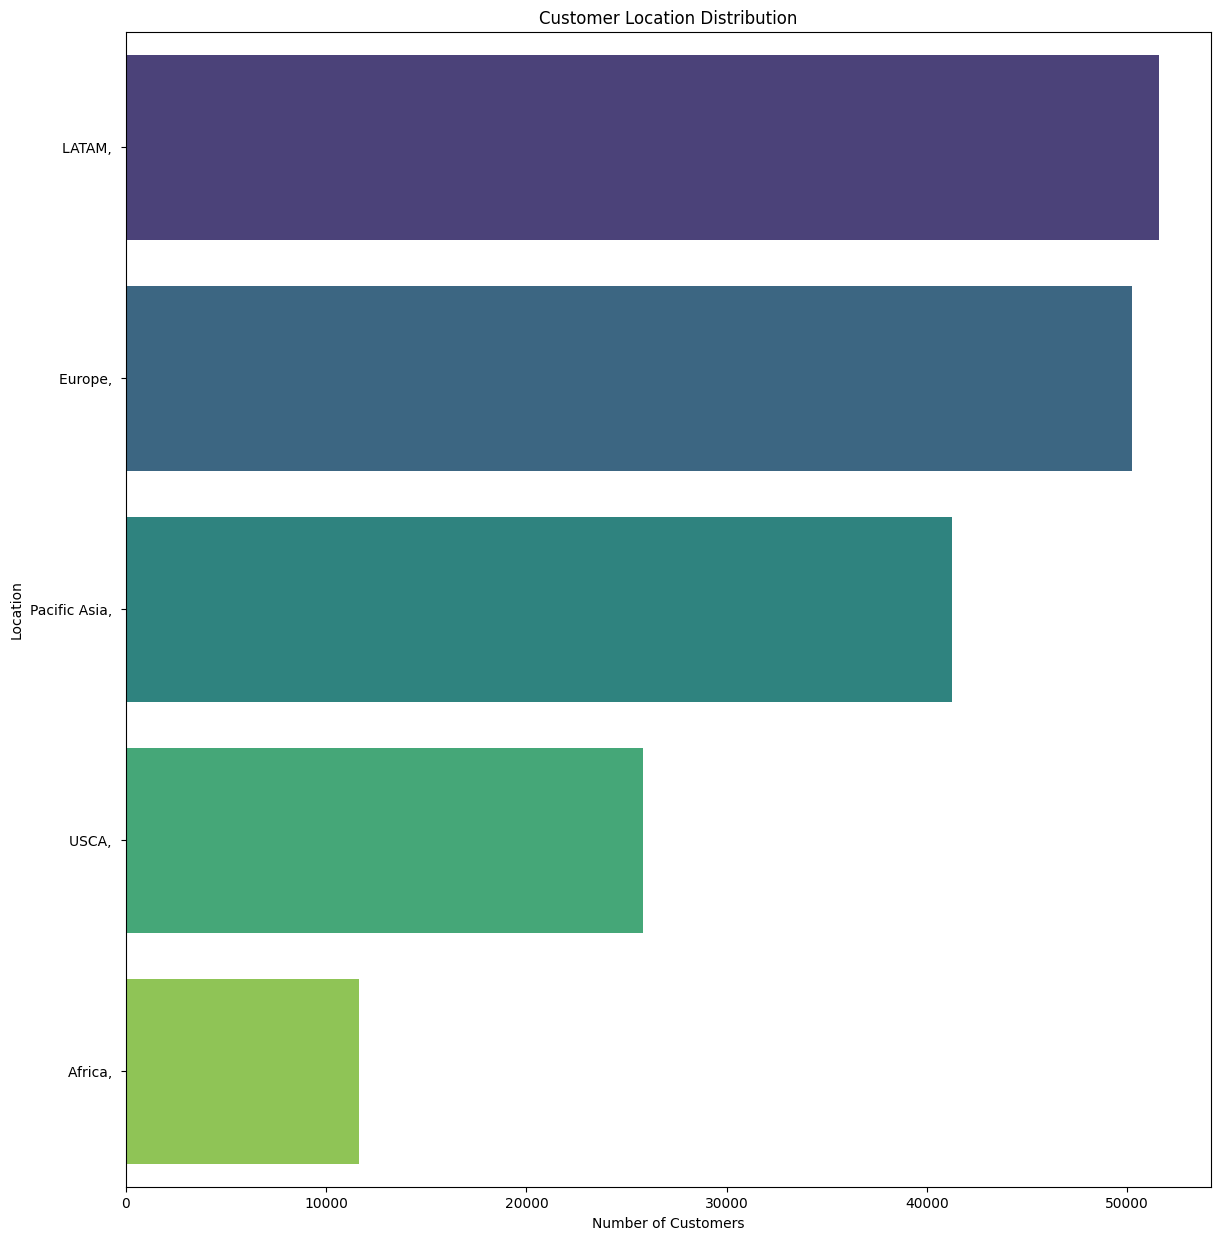

In [60]:

df6 = pd.read_csv("/Users/branly/Desktop/Python Project/AOV2.csv")

df1['Location'] = df1['Market'] + ', ' #+ df['Order_State'] + ', ' #+ df['Order_City']


location_counts = df1['Location'].value_counts()

# Plotting
plt.figure(figsize=(14, 15))
sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')
plt.title('Customer Location Distribution')
plt.xlabel('Number of Customers')
plt.ylabel('Location')
plt.show()


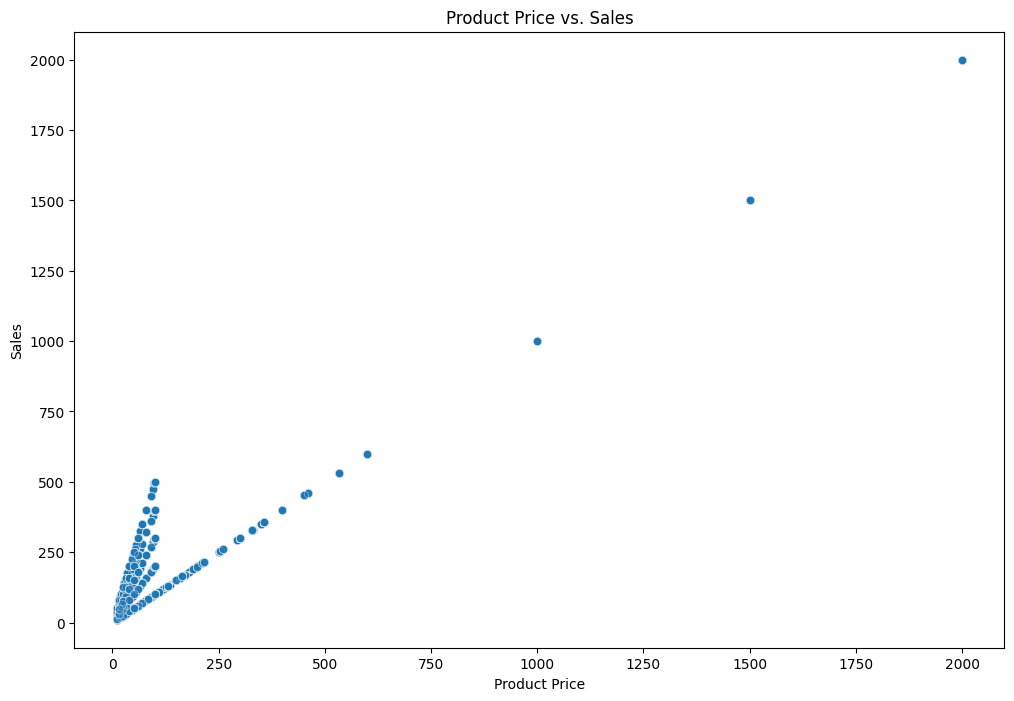

In [61]:
df6 = pd.read_csv("/Users/branly/Desktop/Python Project/AOV2.csv")

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Order_Item_Product_Price', y='Sales', data=df1, alpha=0.5)
plt.title('Product Price vs. Sales')
plt.xlabel('Product Price')
plt.ylabel('Sales')
plt.show()

/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_82326/1380160744.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_sales_by_price = df1.groupby(price_bins)['Sales'].mean()


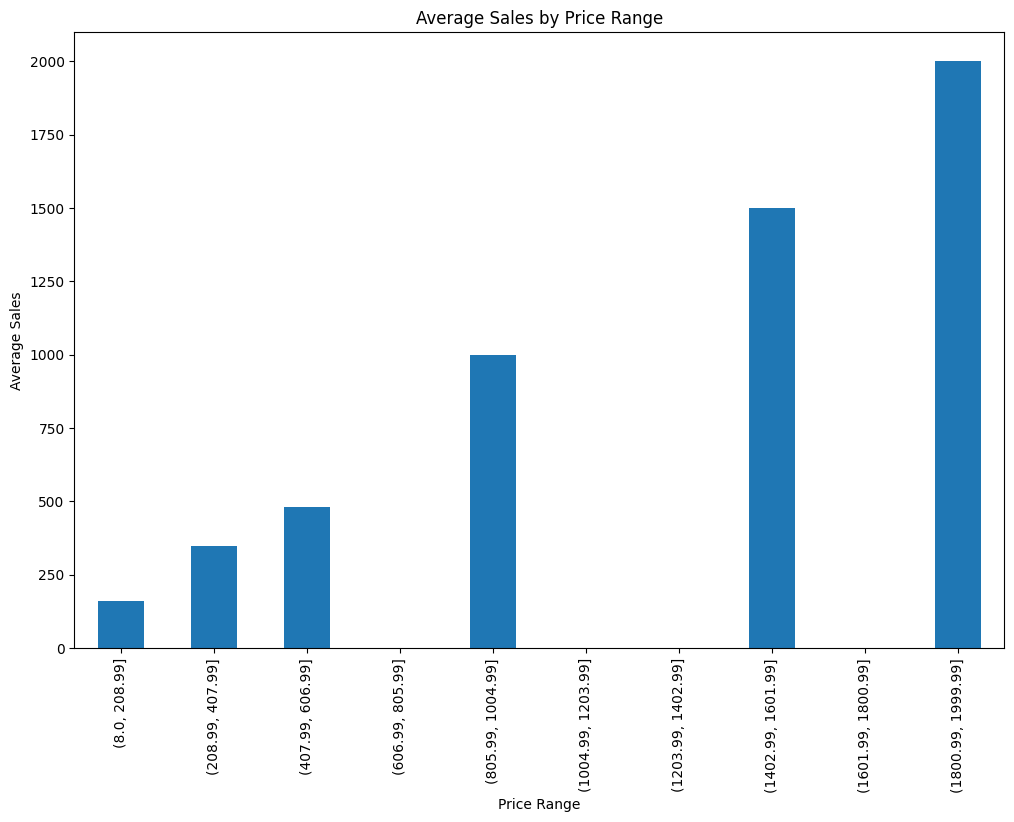

In [62]:
# Create price bins
price_bins = pd.cut(df1['Order_Item_Product_Price'], bins=10)

# Calculate average sales for each price bin
average_sales_by_price = df1.groupby(price_bins)['Sales'].mean()

# Bar plot for average sales by price range
plt.figure(figsize=(12, 8))
average_sales_by_price.plot(kind='bar')
plt.title('Average Sales by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Sales')
plt.show()


/var/folders/fy/fj7y6ph920j5r199851bfn1r0000gn/T/ipykernel_82326/1128514859.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_aov.index, y=segment_aov.values, palette='viridis')


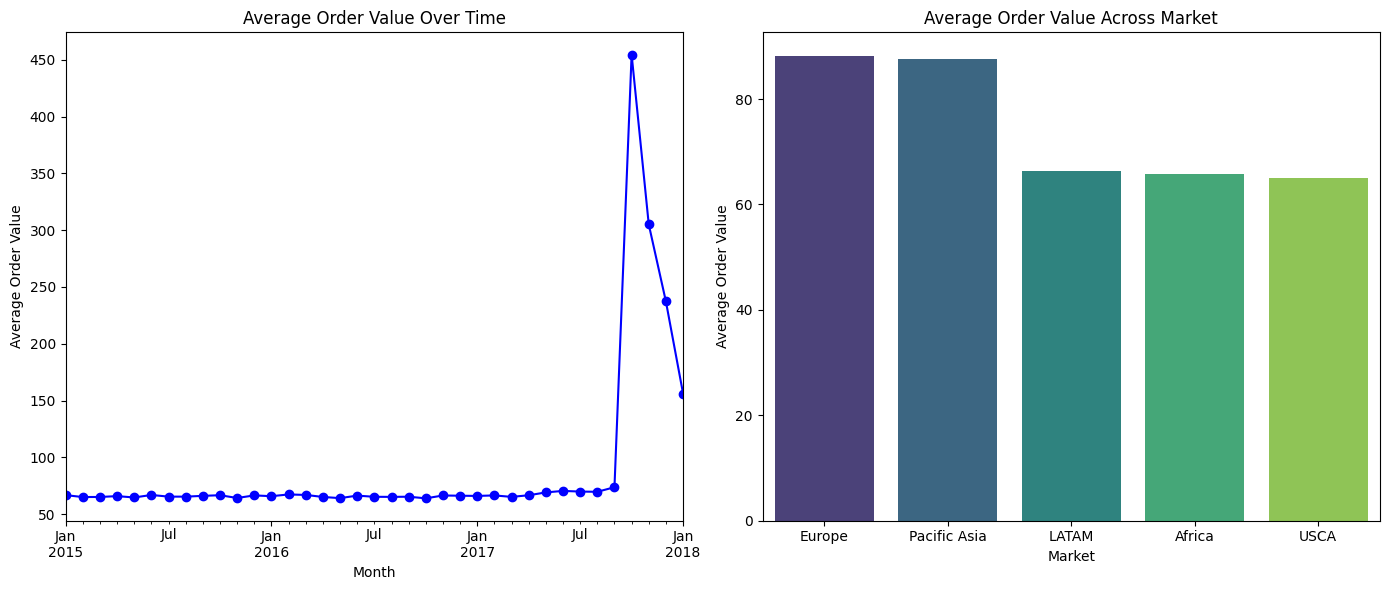

In [78]:


df23 = pd.read_csv("/Users/branly/Desktop/Python Project/OrderID.csv")

df23['OrderDate'] = pd.to_datetime(df23['OrderDate'])


df23['AOV'] = df23['Sales'] / df23.groupby('Order_Id')['Order_Id'].transform('count')


monthly_aov = df23.resample('M', on='OrderDate')['AOV'].mean()


segment_aov = df23.groupby('Market')['AOV'].mean().sort_values(ascending=False)


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
monthly_aov.plot(marker='o', linestyle='-', color='b')
plt.title('Average Order Value Over Time')
plt.xlabel('Month')
plt.ylabel('Average Order Value')

plt.subplot(1, 2, 2)
sns.barplot(x=segment_aov.index, y=segment_aov.values, palette='viridis')
plt.title('Average Order Value Across Market')
plt.xlabel('Market')
plt.ylabel('Average Order Value')

plt.tight_layout()
plt.show()


In [138]:
df44 = pd.read_csv("/Users/branly/Desktop/Python Project/Test2.csv")

aggregate = {
    'Category_Name': list,
    'Sales': 'last',
    'Order_Id': 'last',


}


grouped_df = df44.groupby('column1').agg(aggregate).reset_index()

grouped_df.head()



,column1,Category_Name,Sales,Order_Id
0,0,[Sporting Goods],327.75,77202
1,1,[Sporting Goods],327.75,75939
2,2,[Sporting Goods],327.75,75938
3,3,[Sporting Goods],327.75,75937
4,4,[Sporting Goods],327.75,75936
